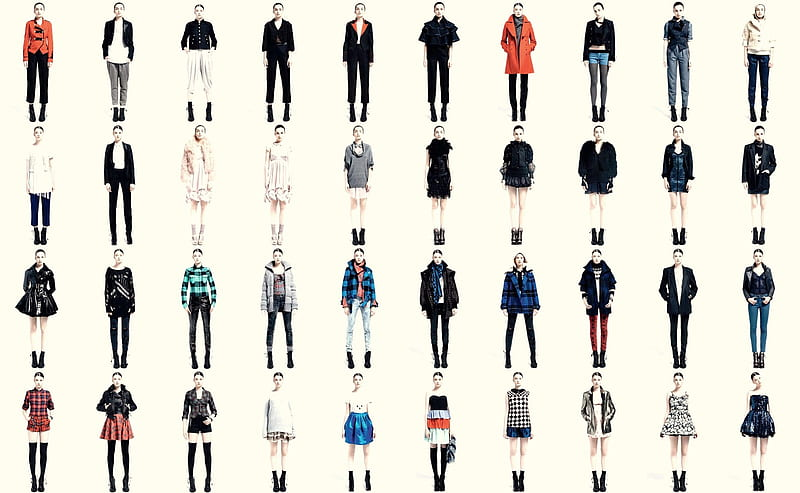

# Fashion Retail Sales Analysis

Data source: https://www.kaggle.com/datasets/atharvasoundankar/fashion-retail-sales/data

### Dataset Overview:

This dataset contains 3,400 records of fashion retail sales, capturing various details about customer purchases, including item details, purchase amounts, ratings, and payment methods. It is useful for analyzing customer buying behavior, product popularity, and payment preferences.

### Columns Description:

* Customer Reference ID -> A unique identifier for each customer.

* Item Purchased -> The name of the fashion item purchased.

* Purchase Amount (USD) -> The purchase price of the item in USD.

* Date Purchase -> The date on which the purchase was made (format: DD-MM-YYYY).

* Review Rating -> The customer review rating (scale: 1 to 5).

* Payment Method -> The payment method used.

### Notebook Overview:

Based on Data Analysis criteria, this notebook is developed by 2 key steps. 

Part 1 - Data loading and cleaning

Part 2 - Data analysis and visualization

____________________

## Part 1 - Data loading and cleaning

In [99]:
# Import necessaries
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
#Data loading
try:
    file = pd.read_csv('Fashion_Retail_Sales.csv')
    df = file.copy()
except: 
    print('Something went wrong when reading the CSV file!')

In [101]:
df.sample(10) # Get 10 samples randomly

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
1469,4093,Sunglasses,36.0,30-04-2023,2.3,Cash
2542,4061,Overalls,33.0,10-11-2022,1.3,Credit Card
2665,4028,Pajamas,NaN,12-10-2022,NaN,Credit Card
2603,4113,Shorts,163.0,26-06-2023,4.2,Cash
816,3990,Belt,177.0,11-01-2023,4.7,Credit Card
3253,4098,Raincoat,NaN,17-04-2023,3.1,Credit Card
574,4006,Pajamas,70.0,22-11-2022,2.4,Cash
924,3971,Pants,45.0,03-11-2022,1.6,Cash
756,4001,Dress,99.0,12-01-2023,3.2,Credit Card
352,4008,Loafers,117.0,04-05-2023,3.5,Credit Card


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [103]:
df[['Purchase Amount (USD)','Review Rating']].describe() # Statistical Analysis

,Purchase Amount (USD),Review Rating
count,2750.000000,3076.000000
mean,156.709818,2.999057
std,419.536669,1.156505
min,10.000000,1.000000
25%,57.000000,2.000000
50%,110.000000,3.000000
75%,155.750000,4.000000
max,4932.000000,5.000000


In [104]:
df.isnull().sum() # Total number of null values in data frame

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [105]:
df.duplicated().sum() # Total number of duplicated values in data frame

0

As it showed, there are null values in 'Purchase Amount (USD)' and 'Review Rating' columns.
In terms of tackle this problem we must fill them. Two strategies are considered:

* NaN values in 'Review Rating' will be filled with 'Unrated' word.

* NaN values in 'Purchase Amount (USD)' will be filled with average sale of each item. The following picture showcases the process:

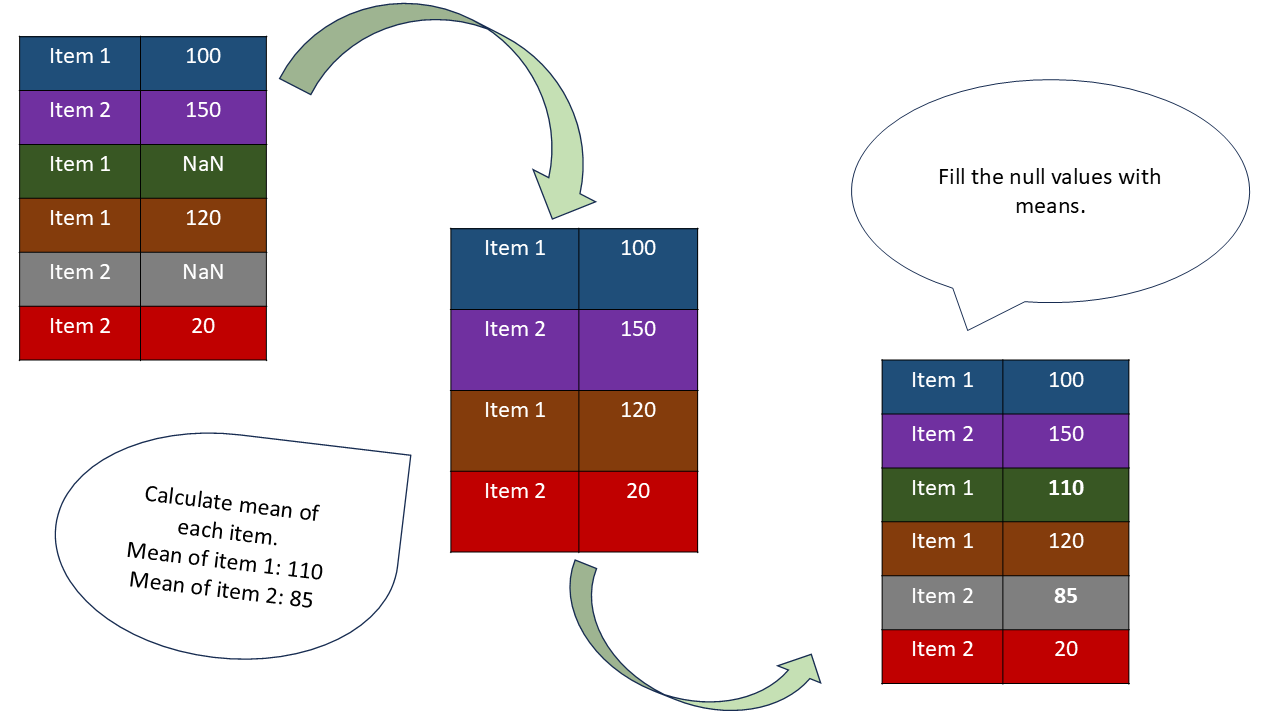

Handling NaN data in 'Review Rating' column

In [106]:
# Fill the null values in 'Review Rating' column with 'Unrated' word, so we can analyze this feature.
df['Review Rating'] = df['Review Rating'].fillna('Unrated')

In [107]:
df.isnull().sum() # Check if null values are filled.

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating              0
Payment Method             0
dtype: int64

Handling NaN data in 'Purchase Amount (USD)' column

In [108]:
# Create an empty dictionary to store each item and its average of sale as key : value
mean_of_items_price = dict() 

# Iterate a for loop in 'Item Purchased' column
for item in df['Item Purchased'].unique():
    temporary_df = df[df['Item Purchased']==item] # Create data fram from each item
    mean_of_items_price[item] = int(temporary_df['Purchase Amount (USD)'].mean()) # Store the item and its average sale in dictionary

In [109]:
mean_of_items_price

{'Handbag': 214,
 'Tunic': 319,
 'Tank Top': 125,
 'Leggings': 165,
 'Wallet': 156,
 'Onesie': 161,
 'Jacket': 157,
 'Trousers': 161,
 'Jeans': 272,
 'Loafers': 183,
 'Slippers': 245,
 'Bowtie': 197,
 'Pajamas': 209,
 'Trench Coat': 178,
 'Poncho': 190,
 'Gloves': 237,
 'Romper': 197,
 'T-shirt': 143,
 'Flip-Flops': 275,
 'Shorts': 171,
 'Blazer': 184,
 'Boots': 228,
 'Belt': 151,
 'Hoodie': 154,
 'Sweater': 213,
 'Blouse': 183,
 'Swimsuit': 184,
 'Kimono': 149,
 'Cardigan': 151,
 'Socks': 136,
 'Pants': 130,
 'Scarf': 155,
 'Backpack': 112,
 'Dress': 93,
 'Camisole': 98,
 'Sneakers': 109,
 'Flannel Shirt': 102,
 'Tie': 103,
 'Polo Shirt': 105,
 'Umbrella': 107,
 'Hat': 103,
 'Sun Hat': 97,
 'Overalls': 103,
 'Coat': 106,
 'Sunglasses': 93,
 'Vest': 106,
 'Sandals': 118,
 'Jumpsuit': 114,
 'Raincoat': 123,
 'Skirt': 105}

In [110]:
dfs = list() # Create an empty list to store the data frames
df_NaN = df[df['Purchase Amount (USD)'].isna()] # Create a data frame where values are Null in 'Purchase Amount (USD)' column

# Iterate a for loop in 'Item Purchased' column in the new data frame
for item in df_NaN['Item Purchased'].unique():
    temporary_df = df_NaN[df_NaN['Item Purchased']==item] # Create a data fram from each item
    temporary_df_copy = temporary_df.copy() # Make a copy of temporary_df

    # Fill the null values in 'Purchase Amount (USD)' column with mean sale of each item in dictionary
    temporary_df_copy['Purchase Amount (USD)'] = temporary_df_copy['Purchase Amount (USD)'].fillna(mean_of_items_price[item])
    dfs.append(temporary_df_copy) # Store it in the list

In [111]:
# Unify all the data frames in 'dfs' list and then reset their index
final_df = pd.concat(dfs,axis=0)
final_df = final_df.reset_index()

In [112]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  650 non-null    int64  
 1   Customer Reference ID  650 non-null    int64  
 2   Item Purchased         650 non-null    object 
 3   Purchase Amount (USD)  650 non-null    float64
 4   Date Purchase          650 non-null    object 
 5   Review Rating          650 non-null    object 
 6   Payment Method         650 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 35.7+ KB


In [113]:
final_df.isnull().sum()

index                    0
Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

Finally we create a data frame from cleaned and preprocessed data

In [114]:
df = df.dropna() # Remove all null values from original data that are just in 'Purchase Amount (USD)' column
ready_df = pd.concat([df,final_df],axis=0) # Combine original data and final_df
ready_df = ready_df.drop(['index'],axis=1) # Drop unnecessary column

In [115]:
# Convert dates to datetime format and sort the data from olset to latest
ready_df['Date Purchase'] = pd.to_datetime(ready_df['Date Purchase'],format='%d-%m-%Y')
ready_df = ready_df.sort_values(by='Date Purchase').reset_index(drop=True)

In [116]:
ready_df.head(10) # Top ten rows

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4008,Belt,130.0,2022-10-02,3.4,Credit Card
1,4020,Loafers,183.0,2022-10-02,1.3,Credit Card
2,4071,Raincoat,193.0,2022-10-02,3.9,Credit Card
3,4108,Handbag,50.0,2022-10-02,2.1,Credit Card
4,4077,T-shirt,143.0,2022-10-02,2.1,Cash
5,4014,Tank Top,99.0,2022-10-02,1.2,Cash
6,4093,Handbag,24.0,2022-10-02,2.8,Credit Card
7,4092,Polo Shirt,200.0,2022-10-02,1.8,Credit Card
8,4025,Blouse,126.0,2022-10-02,1.5,Cash
9,3973,Hoodie,62.0,2022-10-03,3.5,Cash


In [117]:
ready_df.tail(10) # Last 10 rows

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
3390,4096,Sneakers,83.0,2023-09-30,Unrated,Cash
3391,4104,Kimono,81.0,2023-09-30,3.8,Cash
3392,4003,Leggings,128.0,2023-09-30,2.9,Credit Card
3393,4073,Sneakers,20.0,2023-09-30,2.8,Credit Card
3394,4019,Shorts,154.0,2023-09-30,4.9,Cash
3395,4110,Kimono,46.0,2023-10-01,4.6,Cash
3396,4000,Wallet,58.0,2023-10-01,2.6,Credit Card
3397,4029,Pajamas,151.0,2023-10-01,4.0,Cash
3398,4005,Vest,122.0,2023-10-01,2.0,Cash
3399,4108,Camisole,46.0,2023-10-01,1.8,Cash


In [118]:
ready_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Reference ID  3400 non-null   int64         
 1   Item Purchased         3400 non-null   object        
 2   Purchase Amount (USD)  3400 non-null   float64       
 3   Date Purchase          3400 non-null   datetime64[ns]
 4   Review Rating          3400 non-null   object        
 5   Payment Method         3400 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 159.5+ KB


In [119]:
ready_df.isnull().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [120]:
ready_df.duplicated().sum()

0

___________________________________________________________________________________________________________________________

## Part 2 - Data analysis and visualization

In [121]:
print(f'Total average of sales: ${ready_df['Purchase Amount (USD)'].mean()}')

Total average of sales: $156.4805882352941


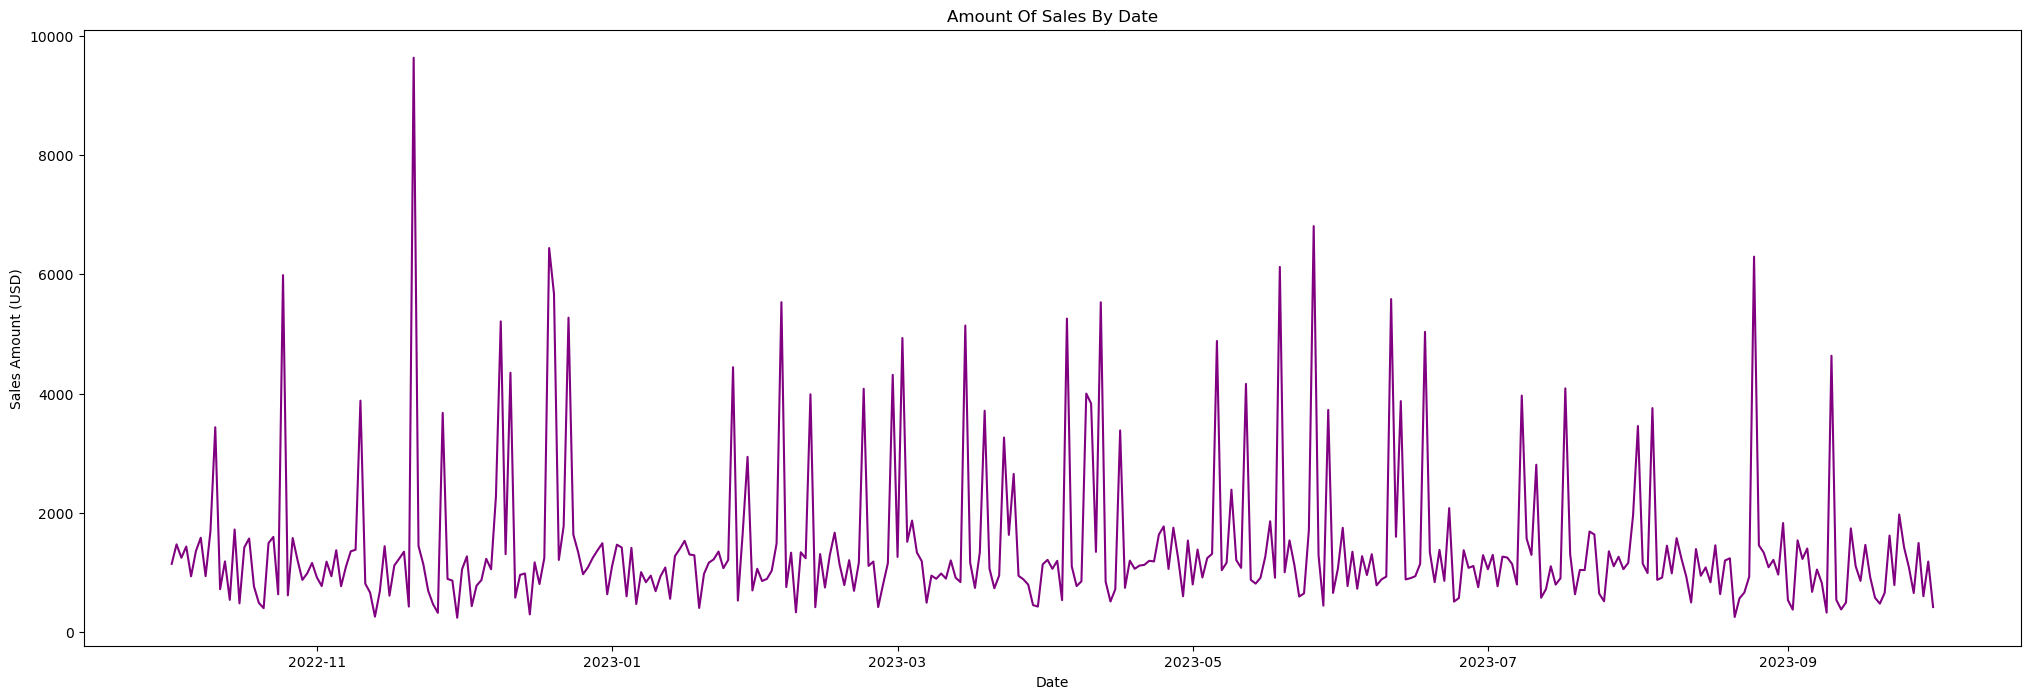

In [122]:
# Group by 'Date Purchase' and sum the purchases
daily_purchase_df = ready_df.groupby('Date Purchase')['Purchase Amount (USD)'].sum().reset_index()
daily_purchase_df['Date Purchase'] = pd.to_datetime(daily_purchase_df['Date Purchase'],format='%d-%m-%Y')
daily_purchase_df = daily_purchase_df.sort_values(by='Date Purchase').reset_index(drop=True)

plt.figure(figsize=(25,8))
plt.plot(daily_purchase_df['Date Purchase'],daily_purchase_df['Purchase Amount (USD)'],color='purple')
plt.xlabel('Date')
plt.ylabel('Sales Amount (USD)')
plt.title('Amount Of Sales By Date')
plt.show()

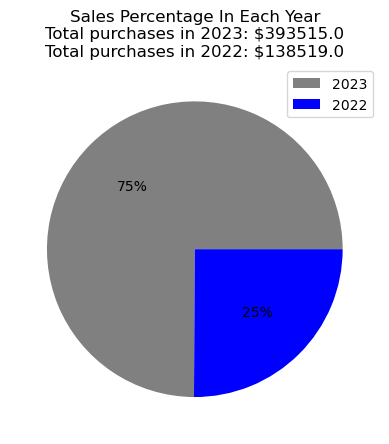

In [123]:
# In order to create a plot for each year we need a data frame just from the years
temp_df = ready_df.copy()
temp_df['Date Purchase'] = pd.DataFrame([str(i).split('-')[0] for i in ready_df['Date Purchase']])

plt.pie(temp_df['Date Purchase'].value_counts().values,autopct='%2.f%%',colors=['gray','blue'])
plt.legend(['2023','2022'])
plt.title(f'Sales Percentage In Each Year\nTotal purchases in 2023: ${temp_df[temp_df['Date Purchase']=='2023']['Purchase Amount (USD)'].sum()}\nTotal purchases in 2022: ${temp_df[temp_df['Date Purchase']=='2022']['Purchase Amount (USD)'].sum()}')
plt.show()

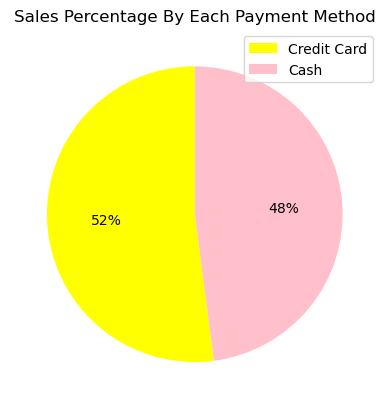

In [124]:
plt.pie(ready_df['Payment Method'].value_counts().values,autopct='%2.f%%',colors=['yellow','pink'],startangle=90)
plt.legend(ready_df['Payment Method'].unique())
plt.title('Sales Percentage By Each Payment Method')
plt.show()

Finding the top customers by overall amount of purchases

In [125]:
samples = list()
for cutomer in ready_df['Customer Reference ID'].unique():
    temp_df = ready_df[ready_df['Customer Reference ID']==cutomer]
    # Store each customer and their total number of sold and overall purchases
    samples.append((cutomer,temp_df['Purchase Amount (USD)'].sum(),len(temp_df)))
    
samples = pd.DataFrame(samples,columns=['Customer ID','Overall amount of purchases (USD)','Number of purchases'])
samples = samples.sort_values(by='Overall amount of purchases (USD)',ascending=False).reset_index(drop=True)

In [126]:
print('Top 20 customers by the most amount of purchases:')
samples.head(20)

Top 20 customers by the most amount of purchases:


,Customer ID,Overall amount of purchases (USD),Number of purchases
0,4040,10914.0,25
1,4109,10146.0,16
2,4044,9447.0,24
3,4108,7974.0,26
4,4075,7890.0,28
5,3984,7182.0,19
6,4010,7154.0,24
7,4103,6813.0,23
8,4002,6782.0,26
9,4067,6683.0,21


Finding the top items by overall amount of purchases

In [127]:
samples = list()
for item in ready_df['Item Purchased'].unique():
    temp_df = ready_df[ready_df['Item Purchased']==item]
    samples.append((item,temp_df['Purchase Amount (USD)'].sum(),len(temp_df))) # Store each item and its total number of sold and overall purchases

samples = pd.DataFrame(samples,columns=['Item','Overall amount of purchases (USD)','Number of purchases'])
samples = samples.sort_values(by='Overall amount of purchases (USD)',ascending=False).reset_index(drop=True)

In [128]:
print('Top 20 items by the most amount of purchases:')
samples.head(20)

Top 20 items by the most amount of purchases:


,Item,Overall amount of purchases (USD),Number of purchases
0,Tunic,19508.0,61
1,Pajamas,16978.0,81
2,Jeans,15788.0,58
3,Handbag,15450.0,72
4,Shorts,14925.0,87
5,Boots,14855.0,65
6,Slippers,14224.0,58
7,Flip-Flops,14059.0,51
8,Gloves,13989.0,59
9,Loafers,13933.0,76


As ratings aren't sorted and categorical, so first we need to preprocess them

In [129]:
counts = list() # Make an empty list to store the results

# Iterate a for loop in each review rating
for rate in ready_df['Review Rating'].unique():
    temp_df = ready_df[ready_df['Review Rating']==rate] # Create a data frame of each review rating
    counts.append((str(rate),len(temp_df))) # Store the rate and its total count in the list
    
counts = sorted(counts) # Sort the 'counts' list

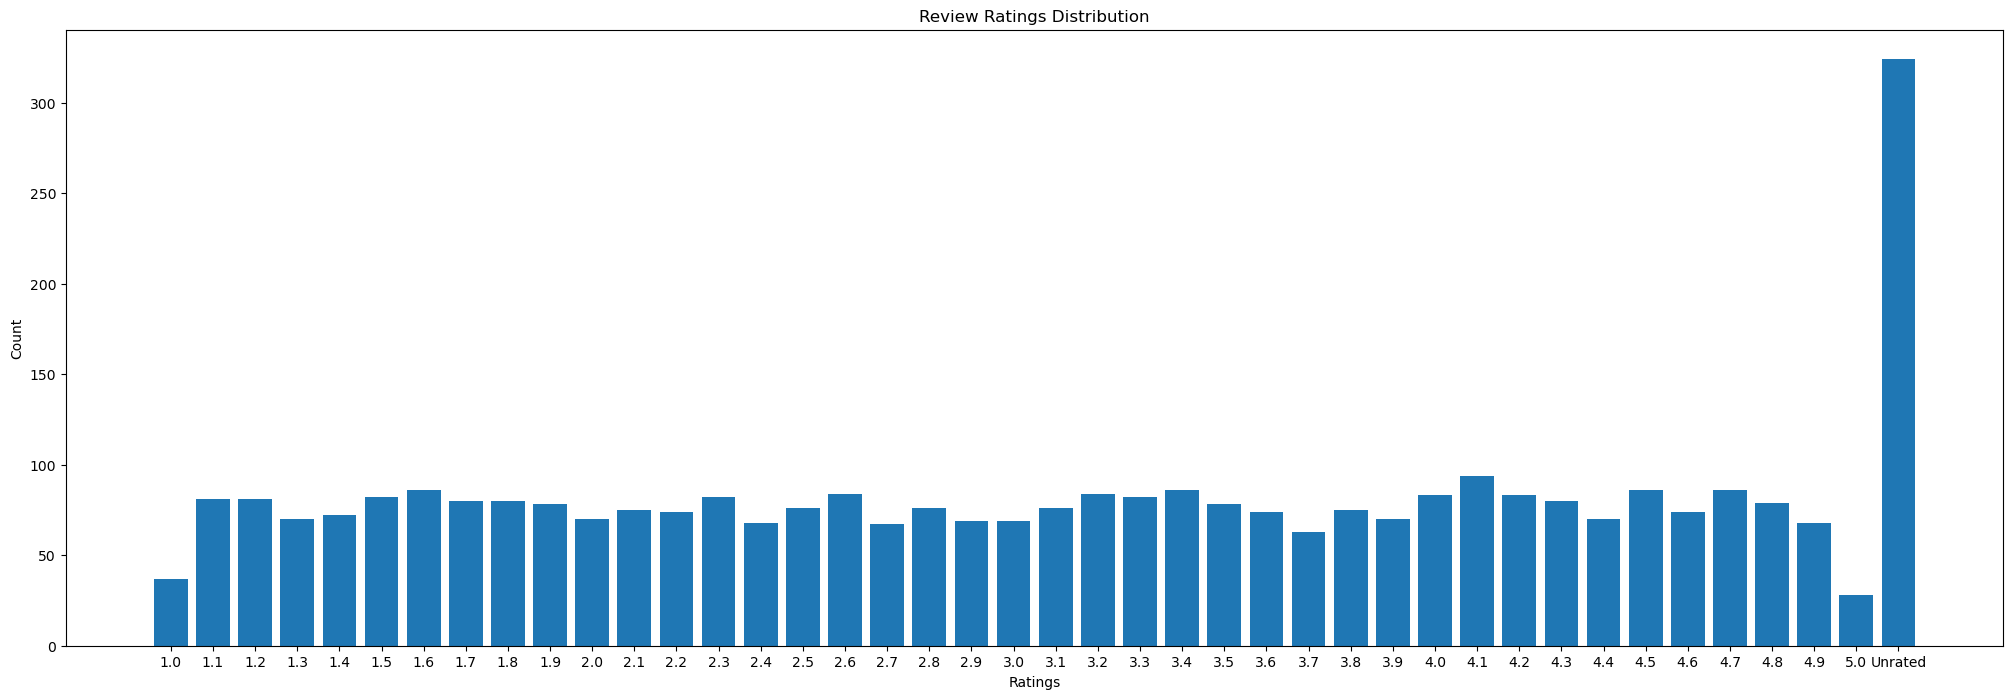

In [130]:
plt.figure(figsize=(25,8))
plt.bar([i[0] for i in counts],[i[1] for i in counts])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Review Ratings Distribution')
plt.show()

Note from the Developer: This notebook is intended solely for educational and learning purposes. Its use for teaching and self-study is fully permitted and encouraged.

# End